<a href="https://colab.research.google.com/github/NikitaJagtap39/brain-tumor-classification-with-gradcam/blob/main/Brain_Tumor_Classification_Using_DL_and_GradCAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 823.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 124.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 142.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 22.5 MB/s eta 0:00:00


In [4]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/model.keras')

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [6]:
!pip install opendatasets

In [7]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 18.4 MB/s eta 0:00:00


In [8]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nsultane
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 157M/157M [00:00<00:00, 2.99GB/s]

In [9]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25835 sha256=9ca0015b5d7ececaefe20a247b1fbbd0a0a286c912ff06b3a01b5c9775879fbc
  Stored in directory: /root/.cache/pip/wheels/5b/76/96/ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils


In [10]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from IPython.display import Image
import imutils

In [11]:
os.mkdir("/content/Crop-Brain-MRI/")
os.mkdir("/content/Crop-Brain-MRI/glioma")
os.mkdir("/content/Crop-Brain-MRI/meningioma")
os.mkdir("/content/Crop-Brain-MRI/notumor")
os.mkdir("/content/Crop-Brain-MRI/pituitary")

In [12]:
os.mkdir("/content/Test-Data")
os.mkdir("/content/Test-Data/glioma")
os.mkdir("/content/Test-Data/meningioma")
os.mkdir("/content/Test-Data/notumor")
os.mkdir("/content/Test-Data/pituitary")

In [13]:
# Data Visualization

In [14]:
train_dir = "/content/brain-tumor-mri-dataset/Training/"
test_dir = "/content/brain-tumor-mri-dataset/Testing/"

In [15]:
classes = os.listdir("/content/brain-tumor-mri-dataset/Training/")
classes

['pituitary', 'glioma', 'meningioma', 'notumor']

In [16]:
filepath_dict = {}

for c in classes:
  filepath_dict[c] = list(map(lambda x : train_dir + c + '/' + x, os.listdir(train_dir + c)))

In [17]:
filepath_dict

{'pituitary': ['/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_91.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1026.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1153.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_82.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_526.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_994.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_782.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_241.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_419.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1149.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1118.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_789.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1175.jpg',
  '/content/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_

In [18]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 736.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 156.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 25.3 MB/s eta 0:00:00


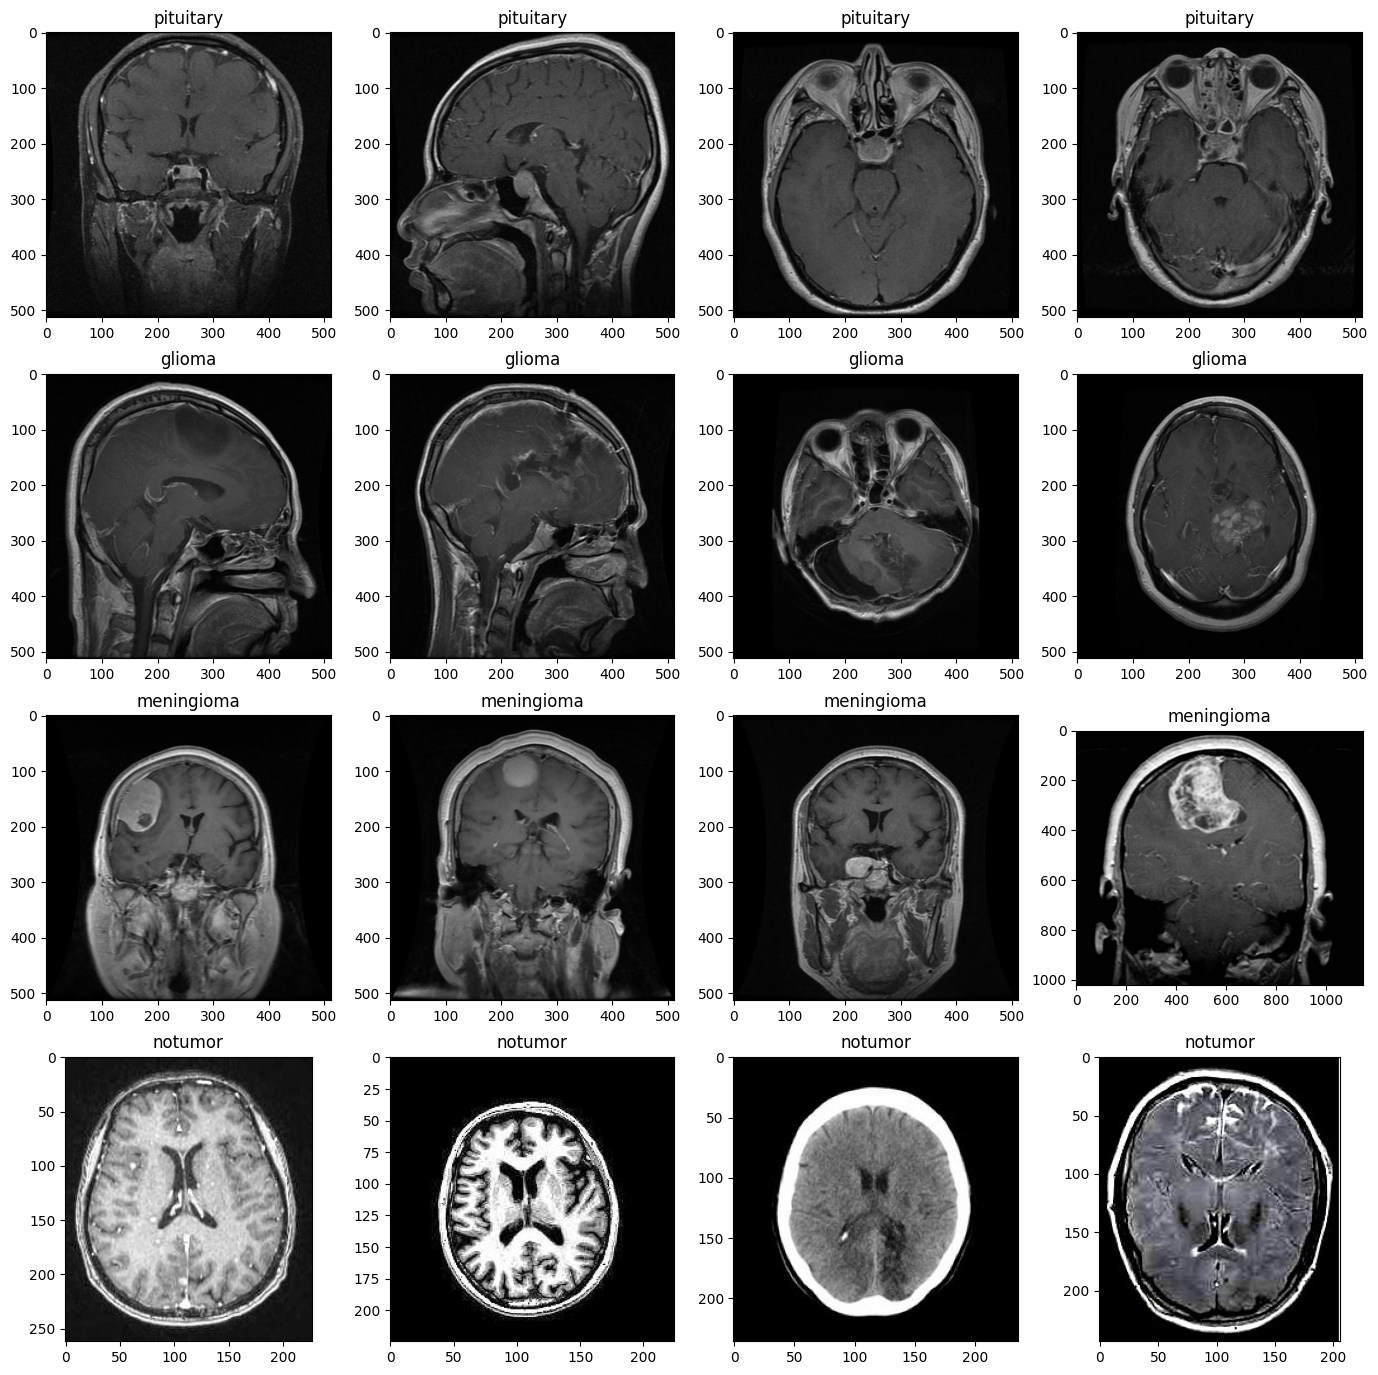

In [18]:
from tensorflow.keras.preprocessing.image import load_img

plt.figure(figsize=(17,17))

index=0

for c in classes:
  random.shuffle(filepath_dict[c])
  path_list = filepath_dict[c][:5]

  for i in range(1,5):
    index += 1
    plt.subplot(4,4,index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)

In [19]:
No_images_per_class = []
Class_name = []
for i in os.listdir("/content/brain-tumor-mri-dataset/Training"):
  train_class = os.listdir(os.path.join("/content/brain-tumor-mri-dataset/Training",i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print(f"Number of images in {i} : {len(train_class)}")


Number of images in pituitary : 1400
Number of images in glioma : 1400
Number of images in meningioma : 1400
Number of images in notumor : 1400


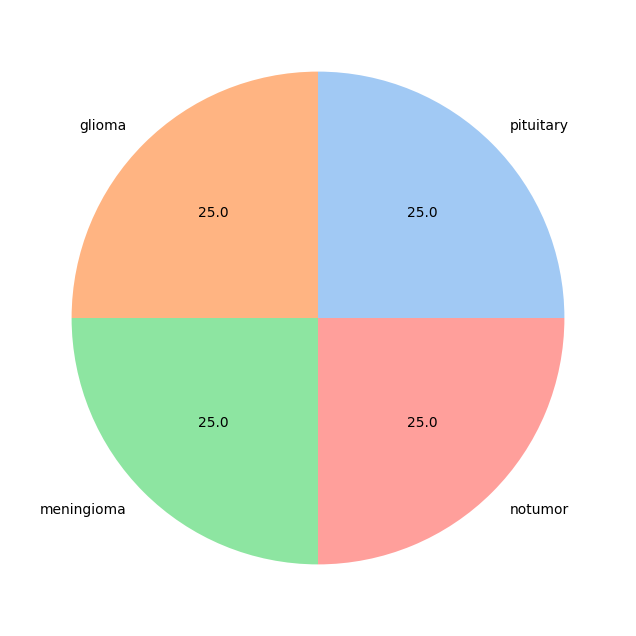

In [20]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')
plt.pie(No_images_per_class, labels = Class_name, autopct= "%1.1f", colors= colors)
plt.show()

In [21]:
def crop_image(image, plot=False):

  img_gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  img_blur = cv2.GaussianBlur(img_gray, (5,5), 0 )
  img_thresh = cv2.threshold(img_blur, 45, 255, cv2.THRESH_BINARY)[1]
  cv2.erode(img_thresh, None, iterations=2)
  img_threh = cv2.dilate(img_thresh, None, iterations=2)

  contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  contours = imutils.grab_contours(contours)

  c = max(contours, key=cv2.contourArea)

  extLeft = tuple(c[c[:,:,0].argmin()])[0]
  extRight = tuple(c[c[:,:,0].argmax()])[0]
  extTop = tuple(c[c[:,:,1].argmin()])[0]
  extBottom = tuple(c[c[:,:,1].argmax()])[0]

  new_img = image[extTop[1]:extBottom[1], extLeft[0]:extRight[0]]

  if plot:
    plt.figure(figsize= (15,6))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.subplot(1,2,2)
    plt.imshow(new_img)
    plt.title("Cropped Image")
    plt.show()

  return new_img


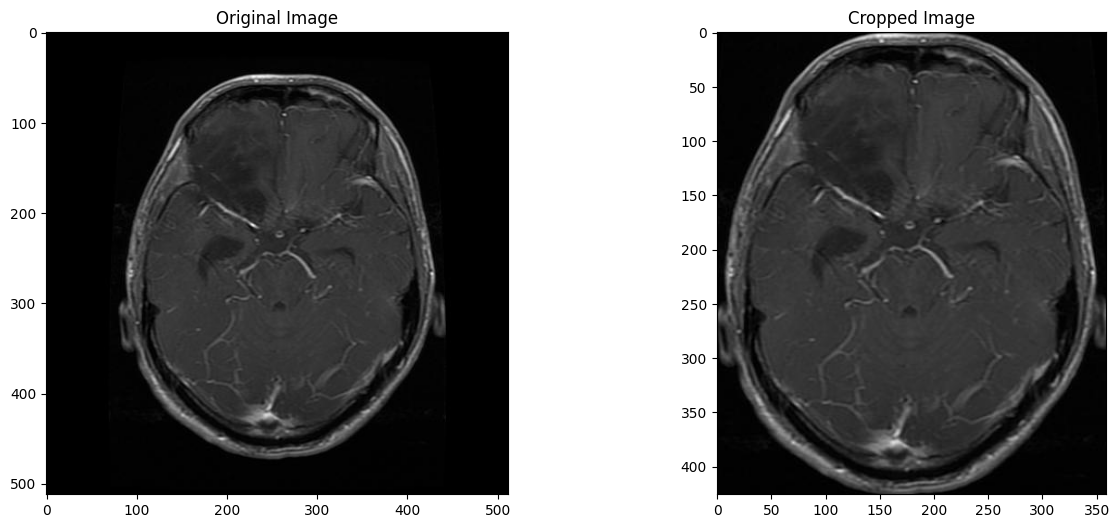

In [22]:
example_img = cv2.imread("/content/brain-tumor-mri-dataset/Testing/glioma/Te-gl_100.jpg")
cropped_imgs = crop_image(example_img, plot=True)

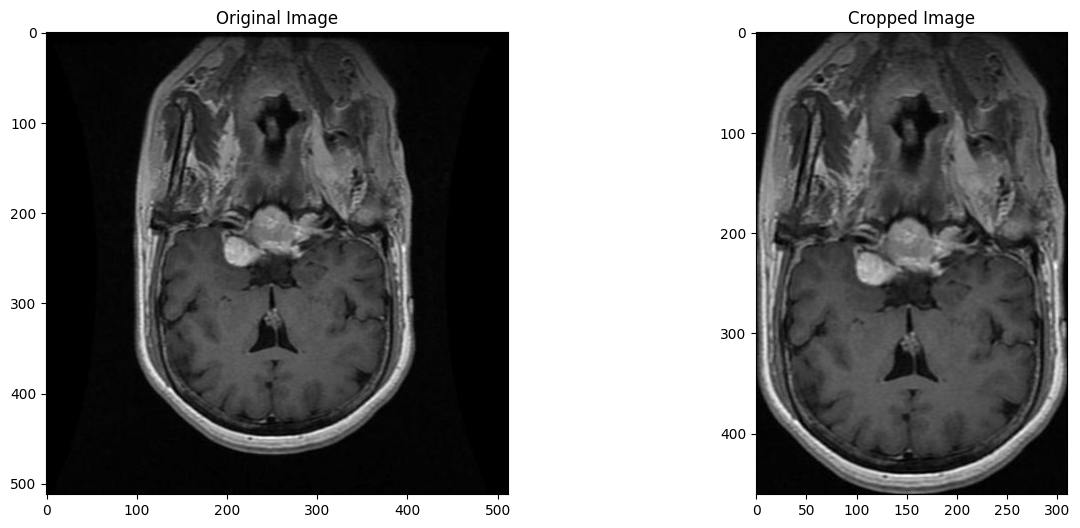

In [23]:
example_img = cv2.imread("/content/brain-tumor-mri-dataset/Training/meningioma/Tr-aug-me_10.jpg")
cropped_imgs = crop_image(example_img, plot=True)

In [24]:
# Saving the cropped Images

In [25]:
glioma = train_dir + "glioma"
meningioma = train_dir + "meningioma"
pituitary = train_dir + "pituitary"
notumor = train_dir + "notumor"
j = 0
for i in tqdm(os.listdir(glioma)):
    path = os.path.join(glioma,i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
      img = cv2.resize(img, (240, 240))
      save_path = '/content/Crop-Brain-MRI/glioma/' + str(j) + '.jpg'
      cv2.imwrite(save_path, img)
      j += 1

100%|██████████| 1400/1400 [00:02<00:00, 611.19it/s]


In [26]:
j = 0
for i in tqdm(os.listdir(meningioma)):
    path = os.path.join(meningioma,i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
      img = cv2.resize(img, (240, 240))
      save_path = '/content/Crop-Brain-MRI/meningioma/' + str(j) + '.jpg'
      cv2.imwrite(save_path, img)
      j += 1

100%|██████████| 1400/1400 [00:02<00:00, 567.28it/s]


In [27]:
j = 0
for i in tqdm(os.listdir(pituitary)):
    path = os.path.join(pituitary,i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
      img = cv2.resize(img, (240, 240))
      save_path = '/content/Crop-Brain-MRI/pituitary/' + str(j) + '.jpg'
      cv2.imwrite(save_path, img)
      j += 1

100%|██████████| 1400/1400 [00:02<00:00, 517.80it/s]


In [28]:
j = 0
for i in tqdm(os.listdir(notumor)):
    path = os.path.join(notumor,i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
      img = cv2.resize(img, (240, 240))
      save_path = '/content/Crop-Brain-MRI/notumor/' + str(j) + '.jpg'
      cv2.imwrite(save_path, img)
      j += 1

100%|██████████| 1400/1400 [00:01<00:00, 795.01it/s]


In [29]:
len(os.listdir(glioma))

1400

In [30]:
test_glioma = test_dir + "glioma"
test_meningioma = test_dir + "meningioma"
test_pituitary = test_dir + "pituitary"
test_notumor = test_dir + "notumor"
j = 0
for i in tqdm(os.listdir(test_glioma)):
    path = os.path.join(test_glioma,i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
      img = cv2.resize(img, (240, 240))
      save_path = '/content/Test-Data/glioma/' + str(j) + '.jpg'
      cv2.imwrite(save_path, img)
      j += 1

100%|██████████| 400/400 [00:00<00:00, 642.73it/s]


In [31]:
j = 0
for i in tqdm(os.listdir(test_meningioma)):
    path = os.path.join(test_meningioma,i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
      img = cv2.resize(img, (240, 240))
      save_path = '/content/Test-Data/meningioma/' + str(j) + '.jpg'
      cv2.imwrite(save_path, img)
      j += 1

100%|██████████| 400/400 [00:00<00:00, 680.73it/s]


In [32]:
j = 0
for i in tqdm(os.listdir(test_pituitary)):
    path = os.path.join(test_pituitary,i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
      img = cv2.resize(img, (240, 240))
      save_path = '/content/Test-Data/pituitary/' + str(j) + '.jpg'
      cv2.imwrite(save_path, img)
      j += 1

100%|██████████| 400/400 [00:00<00:00, 520.25it/s]


In [33]:
j = 0
for i in tqdm(os.listdir(test_notumor)):
    path = os.path.join(test_notumor,i)
    img = cv2.imread(path)
    img = crop_image(img, plot=False)
    if img is not None:
      img = cv2.resize(img, (240, 240))
      save_path = '/content/Test-Data/notumor/' + str(j) + '.jpg'
      cv2.imwrite(save_path, img)
      j += 1

100%|██████████| 400/400 [00:00<00:00, 831.18it/s]


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

In [35]:
datagen = ImageDataGenerator(rotation_range= 10, height_shift_range= 0.2, horizontal_flip= True, validation_split= 0.2)

train_data = datagen.flow_from_directory(directory= "/content/Crop-Brain-MRI/", target_size= (240,240), batch_size = 32, class_mode= 'categorical', subset = 'training')

valid_data = datagen.flow_from_directory(directory= "/content/Crop-Brain-MRI/", target_size= (240,240), batch_size = 32, class_mode= 'categorical', subset = 'training')

test_datagen = ImageDataGenerator()

test_data = datagen.flow_from_directory('/content/Test-Data', target_size= (240,240), class_mode= 'categorical', shuffle= False)

Found 4480 images belonging to 4 classes.
Found 4480 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [36]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [37]:
test_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

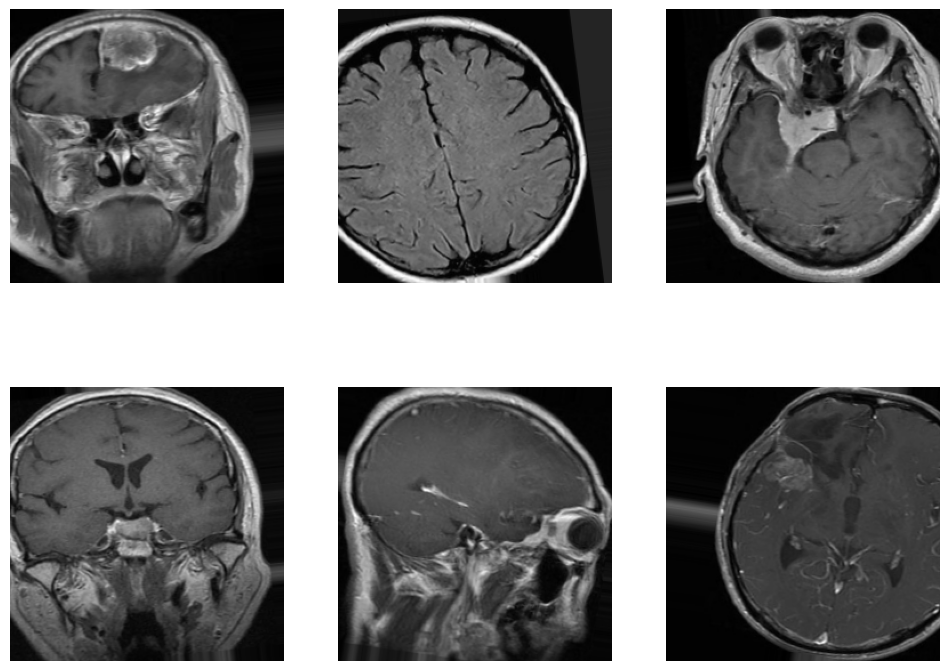

In [38]:
sample_x, sample_y = next(train_data)

plt.figure(figsize=(12,9))

for i in range(6):
  plt.subplot(2,3,i+1)
  sample = array_to_img(sample_x[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)

plt.show()

In [39]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [40]:
effenet = EfficientNetB1(weights= 'imagenet', include_top= False, input_shape= (240,240,3))

model = effenet.output
model = GlobalMaxPooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation= 'softmax')(model)

model = Model(inputs= effenet.input, outputs= model)
model.summary()

27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 240, 240,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 240, 240,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 240, 240,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 241, 241,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 120, 120,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 120, 120,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 120, 120,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 120, 120,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 120, 120,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 120, 120,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 120, 120,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 120, 120,  │        512 │ block1a_se_excit

 Total params: 6,580,363 (25.10 MB)

 Trainable params: 6,518,308 (24.87 MB)

 Non-trainable params: 62,055 (242.41 KB)

In [42]:
model.compile(optimizer= Adam(learning_rate= 0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

checkpoint = ModelCheckpoint('model.keras', monitor = 'val_accuracy', save_best_only= True, mode= 'auto', verbose= 1)

earlystop = EarlyStopping(monitor= 'val_accuracy', patience= 5, verbose= 1, mode= 'auto')

reduce_lr = ReduceLROnPlateau(monitor= 'val_accuracy', factor= 0.3, patience= 2, min_delta=0.001, mode= 'auto', verbose= 1)

In [43]:
%%time
history = model.fit(train_data, epochs=30, validation_data= valid_data, callbacks= [earlystop, checkpoint, reduce_lr], verbose= 1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5333 - loss: 3.2523
Epoch 1: val_accuracy improved from -inf to 0.80513, saving model to model.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.5343 - loss: 3.2443 - val_accuracy: 0.8051 - val_loss: 0.8137 - learning_rate: 1.0000e-04
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8507 - loss: 0.8152
Epoch 2: val_accuracy improved from 0.80513 to 0.84710, saving model to model.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.8509 - loss: 0.8145 - val_accuracy: 0.8471 - val_loss: 0.5996 - learning_rate: 1.0000e-04
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8966 - loss: 0.5277
Epoch 3: val_accuracy improved from 0.84710 to 0.93103, saving model to model.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.8967 - loss: 0.5274 - val_accuracy: 0.9310 - val_loss: 0.2855 - learning_rate: 1.0000e-04
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accur

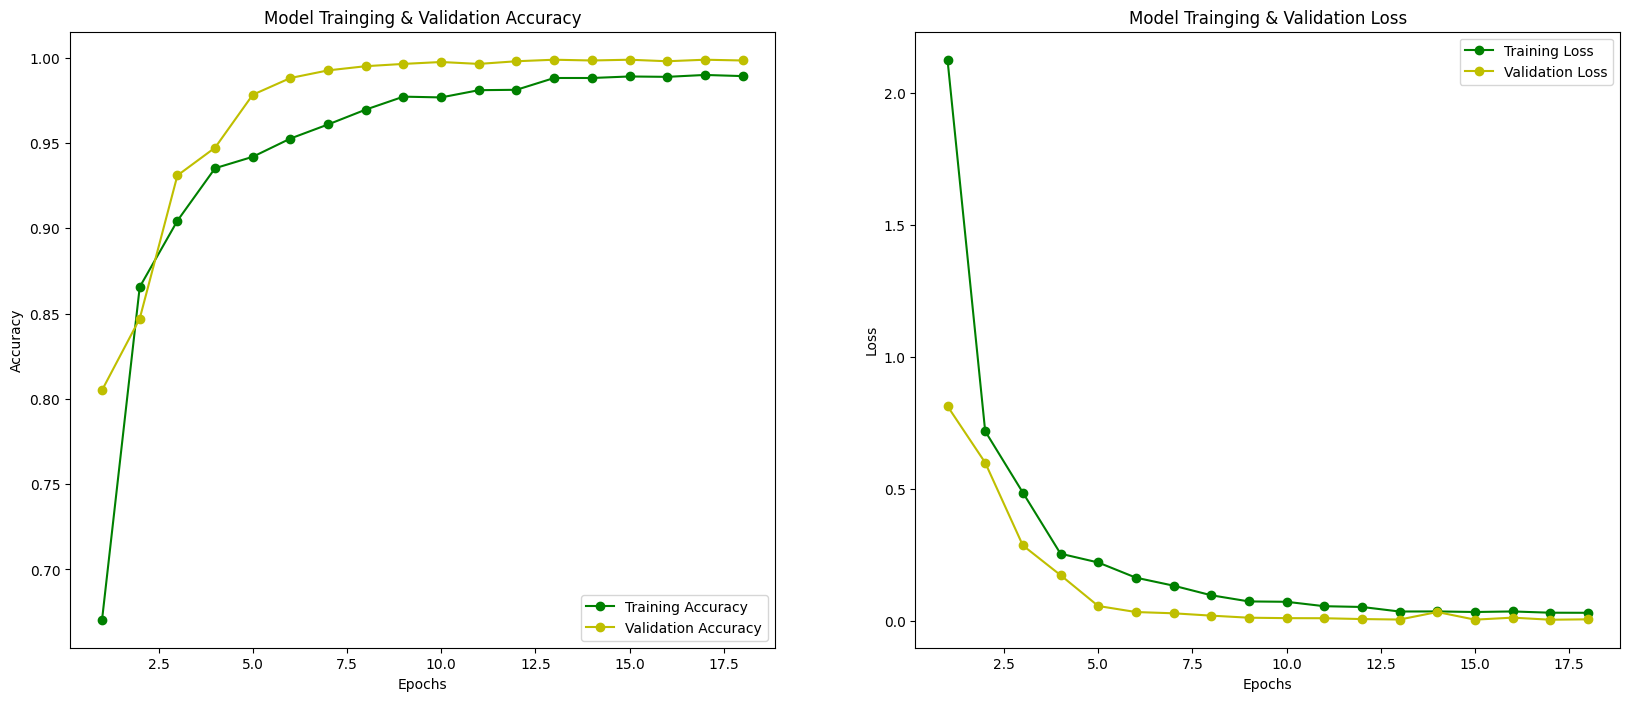

In [44]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,8)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)
ax[0].plot(epochs, train_acc, 'g-o', label= 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'y-o', label= 'Validation Accuracy')
ax[0].set_title('Model Trainging & Validation Accuracy')
ax[0].legend(loc= 'lower right')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label= 'Training Loss')
ax[1].plot(epochs, val_loss, 'y-o', label= 'Validation Loss')
ax[1].set_title('Model Trainging & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [45]:
model.evaluate(train_data)

140/140 ━━━━━━━━━━━━━━━━━━━━ 57s 402ms/step - accuracy: 0.9987 - loss: 0.0104


[0.01641940139234066, 0.9984375238418579]

In [46]:
model.evaluate(test_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 404ms/step - accuracy: 0.8857 - loss: 1.8647


[0.8232547640800476, 0.9468749761581421]

In [47]:
y_test = test_data.classes
y_test_hat = np.argmax(model.predict(test_data), axis = 1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 399ms/step


In [48]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix

In [49]:
cm = confusion_matrix(y_test, y_test_hat)
cm

array([[326,  46,  27,   1],
       [  0, 396,   2,   2],
       [  1,   1, 396,   2],
       [  0,   4,   0, 396]])

In [50]:
test_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

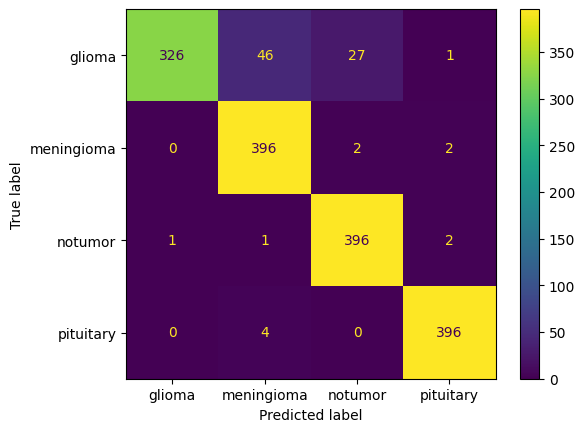

In [51]:
cm_display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= ['glioma', 'meningioma', 'notumor', 'pituitary'])
cm_display.plot()
plt.show()

In [52]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90       400
           1       0.89      0.99      0.94       400
           2       0.93      0.99      0.96       400
           3       0.99      0.99      0.99       400

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [53]:
#Prediction on Test Images


In [55]:
import shutil
shutil.copy('/content/model.keras', '/content/drive/MyDrive/model.keras')

'/content/drive/MyDrive/model.keras'

In [56]:
import os
import numpy as np
import PIL

CLASS_DICT = {0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}

images = []
original = []

# Load all images first
for i in os.listdir('/content/Test-Data'):
    for item in os.listdir(os.path.join('/content/Test-Data', i)):
        img_path = os.path.join('/content/Test-Data', i, item)
        img = PIL.Image.open(img_path)
        img = np.array(img)
        images.append(img)
        original.append(i)

# Convert to numpy array
images = np.array(images)

# Predict ALL images at once
predictions = model.predict(images, batch_size=32, verbose=1)

# Convert predictions to class labels
prediction = [CLASS_DICT[np.argmax(pred)] for pred in predictions]


50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 354ms/step


In [57]:
score = accuracy_score(original, prediction)
score

0.948125

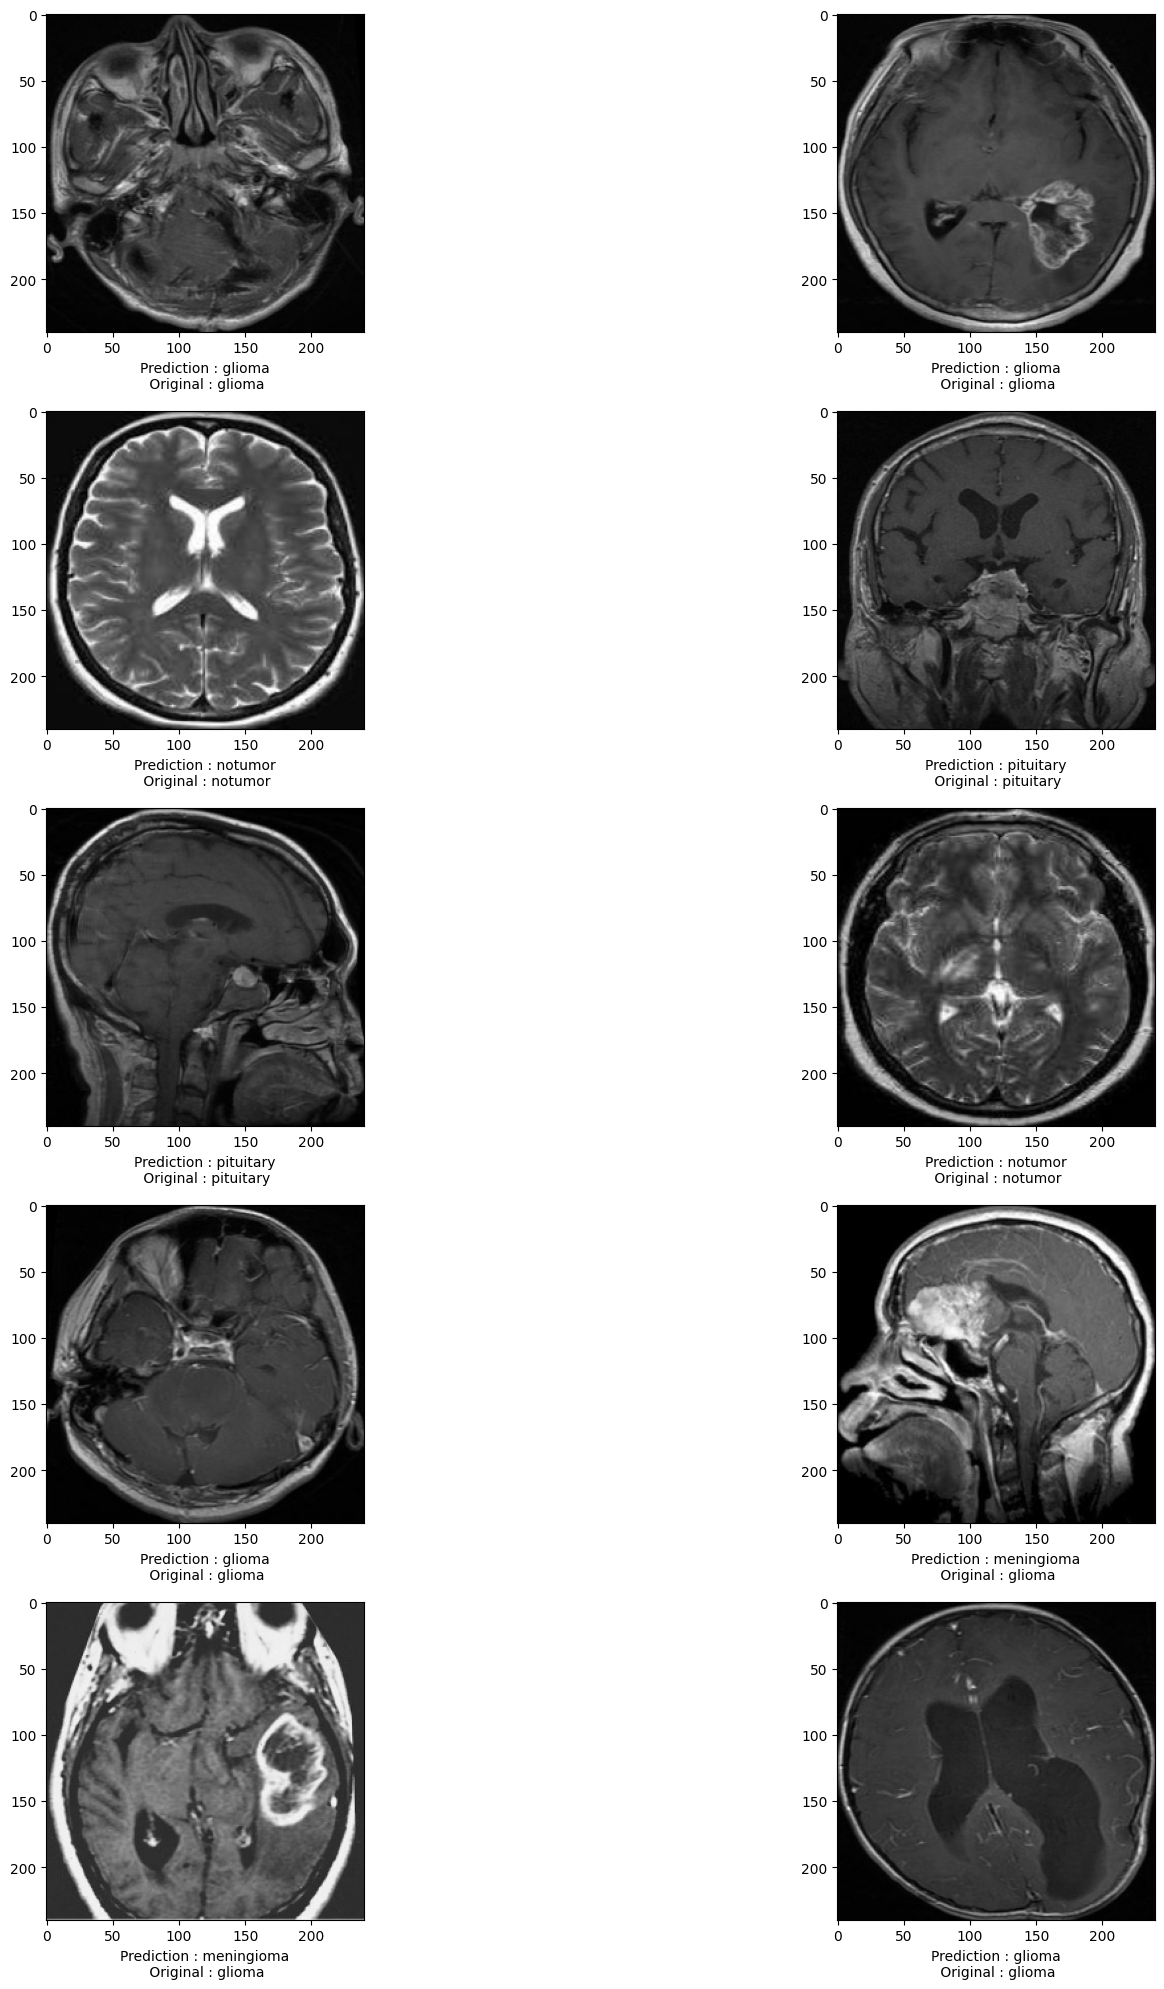

In [58]:
fig = plt.figure(figsize=(20,20))

for i in range(10):
  j = random.randint(0, len(images))
  fig.add_subplot(5,2,i+1)
  plt.xlabel("Prediction : " + prediction[j] + "\n " + "Original : " + original[j])
  plt.imshow(images[j])
fig.tight_layout()
plt.show()

In [98]:
import tensorflow as tf
last_conv_layer = next(x for x in model.layers[::-1] if isinstance(x, tf.keras.layers.Conv2D))
last_conv_layer.name

'top_conv'

In [99]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.models import Model


def VizGradCAM(model, image, interpolant=0.5, plot_results=True):
    """VizGradCAM - Displays GradCAM based on Keras / TensorFlow models
    using the gradients from the last convolutional layer. This function
    should work with all Keras Application listed here:
    https://keras.io/api/applications/

    Parameters:
    model (keras.model): Compiled Model with Weights Loaded
    image: Image to Perform Inference On
    plot_results (boolean): True - Function Plots using PLT
                            False - Returns Heatmap Array

    Returns:
    Heatmap Array?
    """
    # Sanity Check
    assert (
        interpolant > 0 and interpolant < 1
    ), "Heatmap Interpolation Must Be Between 0 - 1"

    last_conv_layer = next(
        x for x in model.layers[::-1] if isinstance(x, K.layers.Conv2D)
    )
    target_layer = model.get_layer(last_conv_layer.name)

    original_img = image
    img = np.expand_dims(original_img, axis=0)
    prediction = model.predict(img)

    # Obtain Prediction Index
    prediction_idx = np.argmax(prediction)

    # Compute Gradient of Top Predicted Class
    with tf.GradientTape() as tape:
        gradient_model = Model([model.inputs], [target_layer.output, model.output])
        conv2d_out, prediction = gradient_model(img)
        # Obtain the Prediction Loss
        loss = prediction[:, prediction_idx]

    # Gradient() computes the gradient using operations recorded
    # in context of this tape
    gradients = tape.gradient(loss, conv2d_out)

    # Obtain the Output from Shape [1 x H x W x CHANNEL] -> [H x W x CHANNEL]
    output = conv2d_out[0]

    # Obtain Depthwise Mean
    weights = tf.reduce_mean(gradients[0], axis=(0, 1))

    # Create a 7x7 Map for Aggregation
    activation_map = np.zeros(output.shape[0:2], dtype=np.float32)

    # Multiply Weights with Every Layer
    for idx, weight in enumerate(weights):
        activation_map += weight * output[:, :, idx]

    # Resize to Size of Image
    activation_map = cv2.resize(
        activation_map.numpy(), (original_img.shape[1], original_img.shape[0])
    )

    # Ensure No Negative Numbers
    activation_map = np.maximum(activation_map, 0)

    # Convert Class Activation Map to 0 - 255
    activation_map = (activation_map - activation_map.min()) / (
        activation_map.max() - activation_map.min()
    )
    activation_map = np.uint8(255 * activation_map)

    # Convert to Heatmap
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)

    # Superimpose Heatmap on Image Data
    original_img = np.uint8(
        (original_img - original_img.min())
        / (original_img.max() - original_img.min())
        * 255
    )

    cvt_heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Enlarge Plot
    plt.rcParams["figure.dpi"] = 100

    if plot_results == True:
        plt.imshow(
            np.uint8(original_img * interpolant + cvt_heatmap * (1 - interpolant))
        )
    else:
        return cvt_heatmap

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


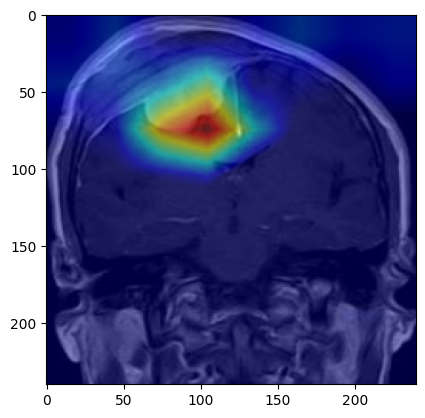

In [102]:
test_img = cv2.imread('/content/Test-Data/meningioma/139.jpg')

VizGradCAM(model, img_to_array(test_img), plot_results=True)


In [103]:
!zip -r brain-tumor-mri-dataset.zip brain-tumor-mri-dataset
!zip -r Test-Data.zip Test-Data
!zip -r Crop-Brain-MRI.zip Crop-Brain-MRI



Streaming output truncated to the last 5000 lines.
  adding: Crop-Brain-MRI/pituitary/975.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/1352.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/817.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/203.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/986.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/198.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/469.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/360.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/189.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/1145.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/818.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/333.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/182.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/231.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/372.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/450.jpg (deflated 1%)
  adding: Crop-Brain-MRI/pituitary/